#### <h1 align=center><font size = 5>Capstone Project -18 </font></h1>
<h2 align=center><font size = 5>AIML Certification Programme</font></h2>

## Team
1. ANUJ ALEX
2. KALWAN GURBACHANSINGH
3. SIDDHARTH GUPTA
4. KRISHNA MURTHY P
5. SREE RAMA KUMAR YEDDANAPUDI

#### Objective:
Objective:
]

### Dataset Selection

#### Q1) Briefly describe the dataset (features, target variable, number of samples).#### Q2) Handle missing values if any.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import re
from rapidfuzz import process, fuzz


# Function to parse soil type strings
def parse_soil_types(soil_str):
    if pd.isna(soil_str):
        return []
    parts = [p.strip() for p in soil_str.split(';') if p.strip()]
    parsed = []
    for p in parts:
        if '-' in p:
            tokens = [t.strip() for t in p.split('-') if t.strip()]
            if tokens:
                try:
                    # Last token is percentage, rest is soil name
                    perc = float(tokens[-1].replace('%','').strip())
                    soil = ' - '.join(tokens[:-1]).strip()
                    parsed.append((soil, perc))
                except:
                    continue
    return parsed

def standardize_crop(raw):
    raw = raw.lower().strip()
    
    # split by common delimiters (comma, +, /, ;)
    parts = re.split(r"[,+/;]+", raw)
    standardized = []

    for part in parts:
        part = part.strip()
        if not part:
            continue
        std = crop_map.get(part, None)
        standardized.append(std if std else "Other")
    
    return list(set(standardized))  # remove duplicates

# --- Master categories ---
master_categories = [
    "Black", "Red", "Sandy", "Loam", "Clay",
    "Brown", "Yellow", "White", "Laterite",
    "Saline", "Alkaline", "Alluvial",
    "Gravel/Stony", "Mixed", "Other"
]

# --- Known corrections / synonyms ---
direct_map = {
    # Misspellings
    "res": "Red",
    "redsoil": "Red",
    "redsoils": "Red",
    "red sandy loam": "Red",
    "red sandy": "Red",
    "red sandy\\": "Red",
    "redsandy": "Red",
    "redsandylo": "Red",
    "redsand": "Red",
    "redloam": "Red",
    "redbrown": "Red",
    "red grey": "Red",
    "red masari": "Red",

    "black soil": "Black",
    "black clay": "Black",
    "black sandy": "Black",
    "black sandy loam": "Black",
    "black loam": "Black",
    "deepblack": "Black",
    "deep black": "Black",
    "normal bla": "Black",
    "black mix": "Black",
    "black mara": "Black",


    "sandi": "Sandy",
    "sanday": "Sandy",
    "sanday+bla": "Sandy",
    "sanday mix": "Sandy",
    "sand mixed": "Sandy",
    "sand mix": "Sandy",
    "sandy loam": "Sandy",
    "sandy mixe": "Sandy",
    "sandy with": "Sandy",
    "sandy brow": "Sandy",
    "sandy whit": "Sandy",


    "clayey loam": "Clay",
    "clay soil": "Clay",
    "caly soil": "Clay",
    "clay-sandy": "Clay",
    "silty clay": "Clay",

    "broan clay": "Brown",
    "brown light": "Brown",
    "brown dark": "Brown",
    "light brow": "Brown",
    "dark brown": "Brown",

    "alkhaline": "Alkaline",
    "alkline": "Alkaline",
    "alkline +": "Alkaline",
    "black alka": "Alkaline",

    "saline soi": "Saline",
    "salain": "Saline",
    "salty": "Saline",
    "salain mix": "Saline",
    "saline mix": "Saline",

    "laterite s": "Laterite",
    "laterite l": "Laterite",
    "laterite m": "Laterite",
    "laterite u": "Laterite",
    "latritate": "Laterite",
    "red lateri": "Laterite",

    "loamy soil": "Loam",
    "loomy": "Loam",
    "loami": "Loam",
    "laomy": "Loam",
    "soil loamy": "Loam",
    "loamy brow": "Loam",
    "ORTHIDS": "Loam",

    "white gara": "White",
    "white mixe": "White",
    "white soil": "White",
    "whitebrown": "White",
    "white sand": "White",
    "white red": "White",
    "white yell": "White",
    "brown whit": "White",

    "yellowblac": "Yellow",
    "yellowbrow": "Yellow",
    "yellow red": "Yellow",
    "white yello": "Yellow",

    # Loam/Alluvial
    "alluvial s": "Alluvial",
}
direct_map.update({
    # Sandy soils
    "SANDY ALFISOL": "Sandy",
    "SANDY ALFISOLS": "Sandy",
    "PSSAMENTS": "Sandy",
    "PSSAMNETS": "Sandy",
    "INNCEPTISOLS": "Sandy",
    "INSEPTISOLS": "Sandy",

    # Loam soils / Alfisols / Inceptisols variants
    "ORTHIDS": "Loam",
    "LOAMY ALFISOLS": "Loam",
    "LOAMY ALFISOL": "Loam",
    "USTALF/USTOLLS": "Loam",
    "UDUPTS/UDALFS": "Loam",
    "UDOLLS/UDALFS": "Loam",
    "INCEPTISOLS": "Loam",

    # Black soils / Vertisols variants
    "VERTISOLS": "Black",
    "VERTIC SOILS": "Black",
    "VERTIC SOLS": "Black",
    "VERTI SOLS": "Black",
    "VRTIC SOILS": "Black",
    "VERRTISOLS": "Black",
    "VERTIC OSILS": "Black",
})
# --- Local overrides (dialect → base class) ---
overrides = {
    "chowdu": "Red",
    "nalla regadi": "Red",
    "regadi": "Red",
    "sowdu": "Red",
    "sudda": "Red",
    "thella kattu": "Red",
    "sudda neela": "Red",
    "tella masaka": "Red",
    "erra maska": "Red",
    "savudu": "Red",
    "garuku": "Other",
    "garasu": "Red",
    "garasu mix": "Red",
    "garsu mix": "Red",
    "mosari": "Red",
    "masari": "Red",
    "masali": "Red",
    "masale": "Red",
    "masori": "Red",
    "madikattu": "Red",
    "maradi": "Red",
    "marad": "Red",
    "mardi": "Red",
    "marali": "Red",
    "moram": "Red",
    "maralugodu": "Red",

    "murrum": "Black",
    "murum soil": "Black",
    "medium bla": "Black",
    "m black": "Black",
    "black muri": "Black",
    "humpli bla": "Black",

    "kari": "Black",
    "kapu": "Black",
    "kappu": "Black",

    "kemp": "Red",
    "kempu": "Red",
    "k-r": "Red",
    "r-k": "Red",
    "r-m": "Red",
    "m-r": "Red",
}

def clean_text(txt: str) -> str:
    txt = str(txt).lower().strip()
    txt = re.sub(r"soil", "", txt)
    txt = re.sub(r"[^a-z\s\+\-]", "", txt)
    return txt.strip()

def standardize_soil(raw: str) -> str:
    if not raw or str(raw).strip() == "":
        return "Other"

    text = clean_text(raw)

    # Overrides first
    for key, val in overrides.items():
        if key in text:
            return val

    # Direct dictionary match
    if text in direct_map:
        return direct_map[text]

    # Fuzzy match fallback
    match, score, _ = process.extractOne(
        text, master_categories, scorer=fuzz.WRatio
    )
    if score >= 80:
        return match

    return "Other"


# samples = [
#     "Black Soil", "Redsoil", "Chowdu", "Alkline +",
#     "Saline Soi", "Laterite m", "Broan Clay",
#     "Sanday+bla", "White gara", "Masari", "Murum Soil"
# ]

# for s in samples:
#     print(s, "→", standardize_soil(s))





crop_map = {
    # Cereals (Grains & Millets)
    "maize": "Maize", "mazi": "Maize", "sweetcorn": "Maize",
    "jowar": "Sorghum", "jonna": "Sorghum", "mahendra jonna": "Sorghum",
    "pacha jonna": "Sorghum", "erra jonna": "Sorghum",
    "bajra": "Pearl Millet",
    "korra": "Foxtail Millet",
    "dhanyalu": "Other Millet",
    "ragi": "Ragi",
    "vari": "Rice", "paddy": "Rice", "paady": "Rice",
    "rice": "Rice",
    "millet": "Other Millet",
    "finger millet": "Ragi",
    "pearl millet": "Pearl Millet",
    "wheat": "Wheat",
    "barley": "Barley",

    # Pulses
    "bengalgram": "Chickpea", "senaga": "Chickpea", "erra senaga": "Chickpea",
    "chickpea": "Chickpea",
    "red gram": "Pigeonpea", "redgram": "Pigeonpea",
    "pigeonpea": "Pigeonpea",
    "green gram": "Green Gram", "mung": "Green Gram",
    "black gram": "Black Gram", "blackgram": "Black Gram",
    "horse gram": "Horse Gram", "horsegram": "Horse Gram",
    "cowpea": "Cowpea", "cow pea": "Cowpea",
    "rajma": "Rajma", "peasara": "Other Pulse", "pulse": "Other Pulse",
    "minor pulses": "Other Pulse",

    # Oilseeds
    "ground nut": "Groundnut", "groundnut": "Groundnut", "g.nut": "Groundnut",
    "grounat": "Groundnut", "ground nat": "Groundnut",
    "veru senaga": "Groundnut",
    "castor": "Castor", "clastor": "Castor",
    "sesamum": "Sesame", "sesumum": "Sesame",
    "sunflower": "Sunflower",
    "linseed": "Linseed",
    "rapeseed": "Rapeseed and Mustard", "mustard": "Rapeseed and Mustard",
    "soyabean": "Soyabean", "soybean": "Soyabean",
    "safflower": "Safflower",

    # Cash crops
    "cotton": "Cotton", "cottan": "Cotton",
    "sugarcane": "Sugarcane", "suger cane": "Sugarcane",
    "sugar cane": "Sugarcane",
    "tobacco": "Tobacco", "pogaku": "Tobacco",
    "oil palm": "Oil Palm",
    "eucalyptus": "Eucalyptus", "eucaliptus": "Eucalyptus",

    # Fruits
    "banana": "Banana", "cocnut": "Coconut", "coconut": "Coconut",
    "papaya": "Papaya", "anaar": "Pomegranate",
    "mango": "Mango",
    "citrus": "Citrus",
    "lime": "Lime", "lemon": "Lime",
    "cashew": "Cashew", "cashewnut": "Cashew", "cashew nut": "Cashew",
    "cashew raina": "Cashew",
    "cocoa": "Cocoa", "cocoa+ coconut": "Cocoa",
    "fruits": "Fruits",

    # Vegetables
    "brinjal": "Brinjal",
    "tomato": "Tomato", "tamato": "Tomato",
    "benda": "Okra", "okra": "Okra",
    "cabbage": "Cabbage", "cabage": "Cabbage",
    "cucumber": "Cucumber",
    "potato": "Potato", "potatao": "Potato", "potatoes": "Potato",
    "onion": "Onion", "onian": "Onion", "oniyan": "Onion",
    "ridge guard": "Ridge Gourd", "donda": "Ridge Gourd",
    "yam": "Yam",
    "vegetable": "Vegetables", "vegetables": "Vegetables",

    # Spices & condiments
    "chilli": "Chilli", "chill": "Chilli", "chillies": "Chilli",
    "chilly": "Chilli", "mirchi": "Chilli",
    "turmeric": "Turmeric", "turmaric": "Turmeric",
    "coriandam": "Coriander",

    # Plantation crops
    "mulberry": "Mulberry", "mulbarry": "Mulberry", "mulberrry": "Mulberry",
    "coffee": "Coffee",
    "red sandal": "Sandalwood", "sandal": "Sandalwood",

    # Others
    "fodder crops": "Fodder", "fodder": "Fodder",
    "flowers": "Flowers",
    "prawns": "Aquaculture",
}


def standardize_crop(raw):
    raw = raw.lower().strip()
    
    # split by common delimiters (comma, +, /, ;)
    parts = re.split(r"[,+/;]+", raw)
    standardized = []

    for part in parts:
        part = part.strip()
        if not part:
            continue
        std = crop_map.get(part, None)
        standardized.append(std if std else "Other")
    
    return list(set(standardized))  # remove duplicates

# tests = [
#     "Cashewnut, Mango (Intercrop Maize And Seasamum)",
#     "Topioca, Cashew",
#     "Paddy/Maize/G.Nut",
#     "Cotton;Red Gram",
#     "Oil Palm+Coconut",
#     "Paddy/ Sugarcane",
#     "Mirchi",
#     "Erra Senaga"
# ]

# for t in tests:
#     print(t, "→", standardize_crop(t))


ranked_soil_crop_map = {
    "Black": {
        1: ["Cotton", "Sorghum", "Pigeonpea"],
        2: ["Sunflower", "Chilli", "Soybean", "Pomegranate"],
        3: ["Groundnut", "Sugarcane"]
    },
    "Red": {
        1: ["Groundnut", "Castor", "Horse Gram", "Pigeonpea"],
        2: ["Millets (Sorghum, Foxtail, Pearl)", "Tomato", "Chilli"],
        3: ["Mango", "Cashew", "Mulberry"]
    },
    "Loamy": {
        1: ["Paddy", "Maize", "Groundnut", "Sunflower"],
        2: ["Banana", "Vegetables (Tomato, Brinjal, Onion, Potato)"],
        3: ["Sugarcane", "Turmeric", "Coriander"]
    },
    "Alluvial": {
        1: ["Paddy", "Sugarcane", "Maize"],
        2: ["Banana", "Vegetables (Potato, Onion, Brinjal)"],
        3: ["Groundnut", "Pulses", "Papaya"]
    },
    "Laterite": {
        1: ["Coconut", "Cashew", "Coffee"],
        2: ["Mango", "Oil Palm", "Eucalyptus"],
        3: ["Sandalwood", "Arecanut"]
    },
    "Sandy": {
        1: ["Groundnut", "Cowpea", "Castor"],
        2: ["Watermelon", "Cucumber", "Vegetables"],
        3: ["Sunflower", "Sesamum"]
    },
    "Clay": {
        1: ["Paddy"],
        2: ["Sugarcane"],
        3: ["Banana"]
    },
    "Saline": {
        1: ["Cotton", "Barley"],  # among your crops, Cotton tolerates
        2: ["Some Paddy varieties"],
        3: ["Casuarina, Salt grasses"]
    },
    "Alkaline": {
        1: ["Cotton"],
        2: ["Paddy (salt-tolerant varieties)"],
        3: ["Eucalyptus"]
    }
}

def get_ranked_crops(soil):
    return ranked_soil_crop_map.get(soil, {})

# # Rainfall 
# rainfall_file = "actual-monthly-rainfall.xlsx"
# rainfall_df = pd.read_excel(rainfall_file, sheet_name="Monthly rainfall", skiprows=4)
# rainfall_df = rainfall_df.rename(columns={
#     "Unnamed: 1": "State",
#     "Unnamed: 2": "Year"
# })

# rainfall_df = rainfall_df.dropna(subset=["State", "Year"])
# # Drop rows where rainfall in any month is less than 0
# rainfall_df = rainfall_df[
#     (rainfall_df[["Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May"]] >= 0).all(axis=1)
# ]
# rainfall_df["Year"] = rainfall_df["Year"].astype(int)
# # Seasonal features
# rainfall_df["Kharif_rain"] = rainfall_df[["Jun", "Jul", "Aug", "Sep"]].sum(axis=1)
# rainfall_df["Rabi_rain"] = rainfall_df[["Oct", "Nov", "Dec", "Jan", "Feb"]].sum(axis=1)
# rainfall_df["Zaid_rain"] = rainfall_df[["Mar", "Apr", "May"]].sum(axis=1)
# rainfall_df.drop(columns=["Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec", "Jan", "Feb","Mar", "Apr","May"],inplace=True)
# rain_fall_avg = rainfall_df.groupby("State")[["Kharif_rain", "Rabi_rain", "Zaid_rain"]].median()
# print(rain_fall_avg.head().to_string())



# fertilizer_file = "fertilizer-consumption.xlsx"
# fertilizer_df = pd.read_excel(fertilizer_file, sheet_name="ALL_st-fert-cons-ua", skiprows=4)
# fertilizer_df["Year"] = fertilizer_df["YEAR"].astype(int)
# fertilizer_df = fertilizer_df[
#     (fertilizer_df[["N", "P", "K"]] >= 0).all(axis=1)
# ]
# fertilizer_df = fertilizer_df.groupby("State")[["N", "P", "K"]].median()
# print(fertilizer_df.head().to_string())



# # -------------------------
# # 1. District-level Soil Information (ICRISAT)
# # -------------------------
icrisat_file5 = "ICRISAT-District Level Data (4).csv"
district_soil = pd.read_csv(icrisat_file5)   # crops, production, yield
df_soils = district_soil[['State Name','Dist Name','SOIL TYPE PERCENT (Percent)']].copy()
df_soils['parsed'] = df_soils['SOIL TYPE PERCENT (Percent)'].apply(parse_soil_types)
df_soils['Dist Name'] = df_soils['Dist Name'].replace({
    "Anantapur": "Ananthapur",
    "S.P.S.Nellore": "Nellore",
    "S.P.S. Nellore": "Nellore",
    "Kadapa YSR": "Kadapa"
})
# Expand into rows
df_expanded = df_soils.explode('parsed').dropna(subset=['parsed'])
df_expanded[['Soil Type','Percent']] = pd.DataFrame(df_expanded['parsed'].tolist(),
                                                    index=df_expanded.index)
df_expanded = df_expanded.drop(columns=['parsed','SOIL TYPE PERCENT (Percent)'])

# Sort by district and percent (descending)
df_expanded_sorted = df_expanded.sort_values(
    by=['State Name','Dist Name','Percent'],
    ascending=[True, True, False]
)
district_soils = df_expanded_sorted.rename(columns={
    "State Name": "State",
    "Dist Name": "District",
    "Percent":"Soil_Percent"
})
# Save or view results
print(district_soils.head())  # preview first rows


# -------------------------
# 2. District-level fertilizer (ICRISAT)
# -------------------------
# ICRISAT district-level
icrisat_file1 = "ICRISAT-District Level Data (2).csv"
icrisat_file2 = "ICRISAT-District Level Data (3).csv"
district_fert1 = pd.read_csv(icrisat_file1)   # district fertilizer
district_fert2 = pd.read_csv(icrisat_file2)   # district fertilizer (later years)
district_fert = pd.concat([district_fert1, district_fert2], axis=0)
district_fert = district_fert.rename(columns={
    "State Name": "State",
    "Dist Name": "District",
    "Year": "Year"
})
district_fert['District'] = district_fert['District'].replace({
    "Anantapur": "Ananthapur",
    "S.P.S.Nellore": "Nellore",
    "S.P.S. Nellore": "Nellore",
    "Kadapa YSR": "Kadapa"
})
regex_pattern = "Percent|CONSUMPTION|PER HA OF GCA|TOTAL PER HA" #
district_fert=district_fert[district_fert.columns[~district_fert.columns.str.contains(regex_pattern, regex=True)]]
district_fert.rename(columns={"NITROGEN PER HA OF NCA (Kg per ha)":"N_per_Ha", "PHOSPHATE PER HA OF NCA (Kg per ha)":"P_per_Ha","POTASH PER HA OF NCA (Kg per ha)":"K_per_Ha"},inplace=True)
numeric_cols = district_fert.select_dtypes(include='number').columns
district_fert = district_fert[(district_fert[numeric_cols] >= 0).all(axis=1)]

district_fert_use = district_fert.groupby(["State","District"])[["N_per_Ha", "P_per_Ha", "K_per_Ha"]].median()
district_fert_use.reset_index(drop=False, inplace=True)
print(district_fert_use.head().to_string())

# # -------------------------
# # 3. Normal rainfall (district)
# # -------------------------
icrisat_file3 = "ICRISAT-District Level Data (5).csv"
district_rainnorm = pd.read_csv(icrisat_file3)  # normal rainfall
district_rainnorm.columns = district_rainnorm.columns.str.strip().str.replace(r"\s+", " ", regex=True)
district_rainnorm.columns = district_rainnorm.columns.str.replace(
    r"NORMAL RAINFALL \(Millimeters\)$", "", regex=True, case=False)
district_rainnorm.columns = district_rainnorm.columns.str.strip()
# print(district_rainnorm.head().to_string())
# Drop rows where rainfall in any month is less than 0
district_rainnorm = district_rainnorm[(district_rainnorm[["JANUARY","FEBRUARY",	"MARCH","APRIL", "MAY", "JUNE",	"JULY",	"AUGUST",	"SEPTEMBER", "OCTOBER",
                        "NOVEMBER",	"DECEMBER",	"ANNUAL"]] >= 0).all(axis=1)]
# Seasonal features
district_rainnorm["Kharif_rain"] = district_rainnorm[["JUNE",	"JULY",	"AUGUST",	"SEPTEMBER"]].sum(axis=1)
district_rainnorm["Rabi_rain"] = district_rainnorm[["OCTOBER", "NOVEMBER",	"DECEMBER", "JANUARY",	"FEBRUARY"]].sum(axis=1)
district_rainnorm["Zaid_rain"] = district_rainnorm[["MARCH",	"APRIL","MAY"]].sum(axis=1)
district_rainnorm.drop(columns=["JANUARY",	"FEBRUARY",	"MARCH",	"APRIL",	"MAY",
                        "JUNE",	"JULY",	"AUGUST",	"SEPTEMBER",	"OCTOBER",
                        "NOVEMBER",	"DECEMBER",	"ANNUAL","Dist Code","State Code","Year"],inplace=True)
district_rainnorm = district_rainnorm.rename(columns={
    "State Name": "State",
    "Dist Name": "District"})
district_rainnorm['District'] = district_rainnorm['District'].replace({
    "Anantapur": "Ananthapur",
    "S.P.S.Nellore": "Nellore",
    "S.P.S. Nellore": "Nellore",
    "Kadapa YSR": "Kadapa"
})
print(district_rainnorm.head().to_string())


# -------------------------
# 4. Crop data (district)
# -------------------------
icrisat_file4 = "ICRISAT-District Level Data.csv"
district_crops = pd.read_csv(icrisat_file4)   # crops, production, yield

regex_pattern = "YIELD|PRODUCTION"
district_crops=district_crops[district_crops.columns[~district_crops.columns.str.contains(regex_pattern, regex=True)]]
district_crops.columns = district_crops.columns.str.strip().str.replace(r"\s+", " ", regex=True)
district_crops.columns = district_crops.columns.str.replace(
    r" AREA \(1000 ha\)$", "", regex=True, case=False)
district_crops = district_crops.rename(columns={
    "State Name": "State",
    "Dist Name": "District",
    "Year": "Year"
})
district_crops["Year"] = district_crops["Year"].astype(int)
district_crops['District'] = district_crops['District'].replace({
    "Anantapur": "Ananthapur",
    "S.P.S.Nellore": "Nellore",
    "S.P.S. Nellore": "Nellore",
    "Kadapa YSR": "Kadapa"
})
district_crops = district_crops.drop(columns=district_crops.filter(regex="KHARIF|RABI").columns)
district_crops.drop(columns=["Dist Code","State Code"],inplace=True)

df_long = district_crops.melt(
    id_vars=["State", "District", "Year"],
    var_name="Crop",
    value_name="Area"
)

# Group by State, District, Crop and calculate median area
median_area = df_long.groupby(["State", "District", "Crop"])["Area"].median().reset_index()

# Rank crops within each State-District by median area (descending)
median_area['Crop_Rank'] = median_area.groupby(["State", "District"])["Area"] \
                                .rank(method="dense", ascending=False)
district_crop_rank = median_area.sort_values(["State", "District", "Crop_Rank"])

print(median_area.head().to_string())

# # -------------------------
# # 5. Merge all into district-level master
# # -------------------------
master_df = pd.merge(district_soils, district_fert_use,
                     on=["State", "District"], how="outer")

# # Merge rainfall 30-year average rain
master_df = pd.merge(master_df, district_rainnorm,
                     on=["State", "District"], how="outer")

# # Merge rainfall 30-year average rain
master_df = pd.merge(master_df, district_crop_rank,
                     on=["State", "District"], how="outer")
direct_map = {k.lower(): v for k, v in direct_map.items()}
overrides = {k.lower(): v for k, v in overrides.items()}
crop_map = {k.lower(): v for k, v in crop_map.items()}
master_df["Stand_Soil"] =  master_df["Soil Type"].apply(lambda x: standardize_soil(str(x)))
master_df["Stand_Crop"] =  master_df["Crop"].apply(lambda x: standardize_crop(str(x))).

# -------------------------
# 6. Save final dataset
# -------------------------
master_df=master_df[master_df["State"] == "Andhra Pradesh"]
master_df.drop(columns=["Soil Type","Crop"],inplace=True)
master_df.to_csv("AP_district_level_master.csv", index=False)
print("District-level master dataset saved as district_level_master.csv")
master_df.head().to_string()

# # -------------------------
# # 10. Quick EDA
# # -------------------------

# # Shape
# print("Dataset shape:", master_df.shape)

# # Missing values
# missing_summary = master_df.isnull().median().sort_values(ascending=False) * 100
# print("\n Missing values (% of rows):")
# print(missing_summary.head(20))   # top 20 most-missing columns

# # -------------------------
# # 7b. Suppress duplicates
# # Ensure key columns exist
# if {"State", "District", "Year"}.issubset(master_df.columns):
#     before = master_df.shape[0]
#     master_df = master_df.drop_duplicates(subset=["State", "District", "Year"], keep="first")
#     after = master_df.shape[0]
#     print(f" Duplicates removed: {before - after} rows dropped")
# else:
#     print("Cannot check duplicates – key columns missing")


# # Descriptive statistics
# print("\n Descriptive stats (selected variables):")
# key_vars = ["Kharif_rain", "Rabi_rain","Zaid_rain", "Total", 
#             "N", "P", "K", "NPK", 
#             "RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]
# print(master_df[key_vars].describe().T)

# # Correlation matrix
# print("\n Correlation (rainfall, fertilizer, yields):")
# corr_vars = ["Kharif_rain", "Rabi_rain","Zaid_rain", "N", "P", "K", 
#              "RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]
# corr_matrix = master_df[corr_vars].corr()
# print(corr_matrix)

# # Optional: Save correlation to CSV for inspection
# corr_matrix.to_csv("correlation_matrix.csv")

# # Peek at a few rows
# print("\n Sample rows:")
# print(master_df.sample(5, random_state=42))


             State       District      Soil Type  Soil_Percent
51  Andhra Pradesh     Ananthapur  SANDY ALFISOL         100.0
53  Andhra Pradesh       Chittoor  SANDY ALFISOL          80.0
53  Andhra Pradesh       Chittoor        ORTHIDS          20.0
45  Andhra Pradesh  East Godavari        ORTHIDS          65.0
45  Andhra Pradesh  East Godavari  SANDY ALFISOL          35.0
            State       District  N_per_Ha  P_per_Ha  K_per_Ha
0  Andhra Pradesh     Ananthapur     27.71     17.96      6.99
1  Andhra Pradesh       Chittoor     64.24     23.78     11.79
2  Andhra Pradesh  East Godavari    197.19     61.68     33.52
3  Andhra Pradesh         Guntur    159.58     70.83     21.92
4  Andhra Pradesh         Kadapa     81.59     43.11     12.22
          State  District  Kharif_rain  Rabi_rain  Zaid_rain
0  Chhattisgarh      Durg       1096.0      122.0       59.0
1  Chhattisgarh    Bastar       1237.0      164.0      134.0
2  Chhattisgarh    Raipur       1229.0      104.0       55.0


'            State    District  Soil_Percent  N_per_Ha  P_per_Ha  K_per_Ha  Kharif_rain  Rabi_rain  Zaid_rain     Area  Rank Stand_Soil   Stand_Crop\n0  Andhra Pradesh  Ananthapur         100.0     27.71     17.96      6.99        272.0      148.0       77.0  594.740   1.0      Sandy  [Groundnut]\n1  Andhra Pradesh  Ananthapur         100.0     27.71     17.96      6.99        272.0      148.0       77.0  586.860   2.0      Sandy      [Other]\n2  Andhra Pradesh  Ananthapur         100.0     27.71     17.96      6.99        272.0      148.0       77.0   51.825   3.0      Sandy       [Rice]\n3  Andhra Pradesh  Ananthapur         100.0     27.71     17.96      6.99        272.0      148.0       77.0   43.055   4.0      Sandy      [Other]\n4  Andhra Pradesh  Ananthapur         100.0     27.71     17.96      6.99        272.0      148.0       77.0   24.800   5.0      Sandy  [Pigeonpea]'

### Data Preprocessing
Handle missing values if any.
Convert categorical variables (if present) into numerical format.
Split the dataset into training and testing sets (e.g., 80-20 split).

In [2]:
# Identify missing data
nullseries = df.isnull().sum()
print("The following attributes have missing data with counts:")
print(nullseries[nullseries > 0])
print("No missing observations and all attributes are numeric")
cat_var = ["SEX" ,    "EDUCATION",      "MARRIAGE"]
c_var =  ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# # d_var = [s + "_bin" for s in c_var]



The following attributes have missing data with counts:
Series([], dtype: int64)
No missing observations and all attributes are numeric


In [3]:
feat_list =c_var + cat_var #[s + "_bin" for s in c_var]
print(feat_list)
# sns.pairplot(df, hue='default payment next month',palette="bright")
# plt.show()
# Split data into training and testing sets. Startification done on PlacementStatus to ensure test samples have similar proportion as train
train,test, = train_test_split(df, test_size=0.2, random_state=42,stratify=df['default payment next month'])

print(train.shape,test.shape, train.shape, test.shape)
train_X=train.iloc[:,:-1]
train_y =train.iloc[:,-1]
print(train_X.shape)
print(train_y.shape)
test_X=test.iloc[:,:-1]
test_y =test.iloc[:,-1]
print(test_X.shape)
print(test_y.shape)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE']
(24000, 24) (6000, 24) (24000, 24) (6000, 24)
(24000, 23)
(24000,)
(6000, 23)
(6000,)


### Implement SVM


In [4]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf', C=1,class_weight='balanced')
model.fit(train_X, train_y)

SVC(C=1, class_weight='balanced')

In [5]:
print(model.support_vectors_.shape)

print(model.support_vectors_)
y_pred= model.predict(test_X)

(19493, 23)
[[1.600e+05 2.000e+00 2.000e+00 ... 6.100e+03 1.230e+04 6.100e+03]
 [1.500e+05 2.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+04 1.000e+00 2.000e+00 ... 2.940e+02 3.050e+02 1.000e+03]
 ...
 [6.000e+04 1.000e+00 1.000e+00 ... 0.000e+00 1.200e+03 2.269e+03]
 [4.900e+05 1.000e+00 1.000e+00 ... 0.000e+00 1.130e+02 0.000e+00]
 [1.000e+05 2.000e+00 2.000e+00 ... 3.400e+03 3.541e+03 3.894e+03]]


Q5) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives. [1M]

<Axes: >

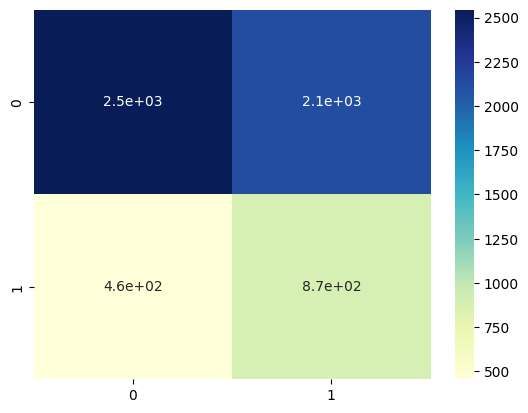

In [6]:
c_m = confusion_matrix(test_y.values.ravel(),y_pred.ravel())
sns.heatmap(c_m,cmap="YlGnBu", annot=True)



In [7]:
pd.crosstab(test["default payment next month"].values.ravel(),y_pred.ravel(), rownames=['Actual'], colnames=['Predicted'], margins=True)

acc = accuracy_score(test["default payment next month"].values.ravel(),y_pred.ravel())
print("Sklearn SVM Accuracy:",acc * 100)

Sklearn SVM Accuracy: 56.95


In [8]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(test["default payment next month"].values.ravel(),y_pred.ravel(),zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66      4673
           1       0.29      0.66      0.40      1327

    accuracy                           0.57      6000
   macro avg       0.57      0.60      0.53      6000
weighted avg       0.72      0.57      0.61      6000



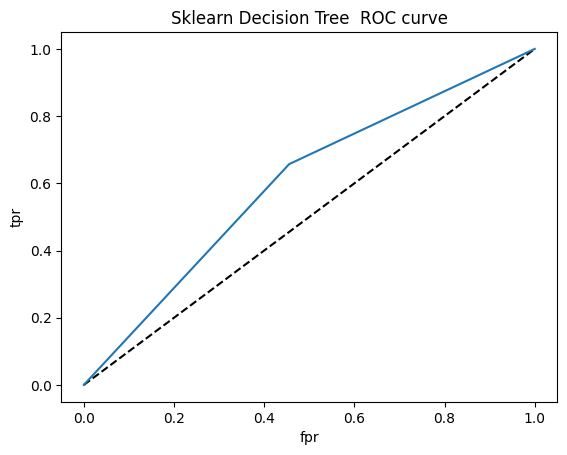

Sklearn SVM Tree   ROC_AUC: 0.6008696723517598


In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test["default payment next month"].values.ravel(),y_pred.ravel())
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Sklearn Decision Tree  ROC curve')
plt.show()
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test["default payment next month"].values.ravel(),y_pred.ravel())
print("Sklearn SVM Tree   ROC_AUC:",roc_auc_score(test["default payment next month"].values.ravel(),y_pred.ravel()))


### Model Hyperparameter Tuning

In [10]:
model_cw = SVC(kernel='rbf', C=1000,class_weight='balanced')
model_cw.fit(train_X, train_y)

y_cw= model_cw.predict(test_X)

Text(0.5, 1.0, 'Tuned SVM')

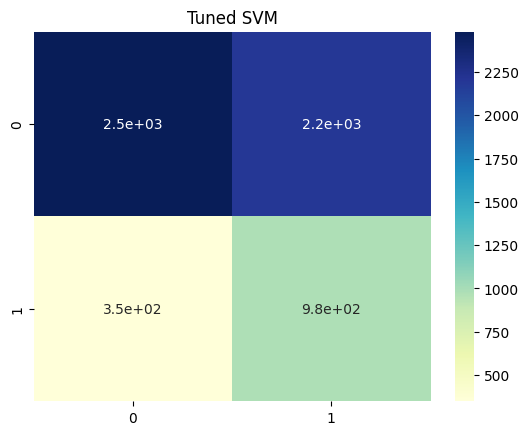

In [11]:
c_m = confusion_matrix(test["default payment next month"].values.ravel(),y_cw.ravel())
sns.heatmap(c_m,cmap="YlGnBu", annot=True)
plt.title("Tuned SVM")

In [12]:
pd.crosstab(test["default payment next month"].values.ravel(),y_cw.ravel(), rownames=['Actual'], colnames=['Predicted'], margins=True)

acc = accuracy_score(test["default payment next month"].values.ravel(),y_cw.ravel())
print("Sklearn SVM after Hyper parameter Tuning:",acc * 100)



Sklearn SVM after Hyper parameter Tuning: 57.666666666666664


In [13]:
print(classification_report( test["default payment next month"].values.ravel(),y_cw.ravel(),zero_division=np.nan,))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66      4673
           1       0.31      0.74      0.44      1327

    accuracy                           0.58      6000
   macro avg       0.59      0.63      0.55      6000
weighted avg       0.75      0.58      0.61      6000



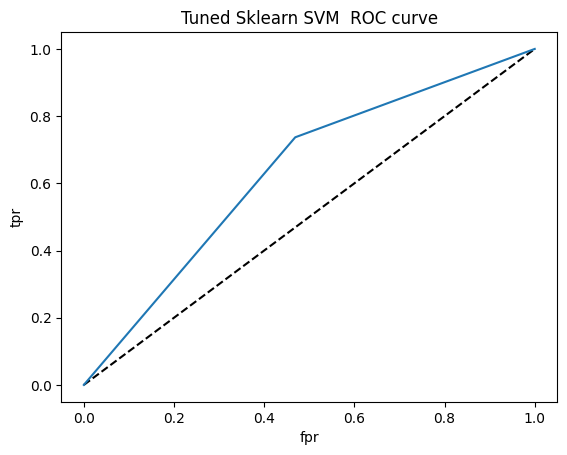

Tuned Sklearn SVM  ROC_AUC: 0.6340685342902863


In [14]:
fpr, tpr, thresholds = roc_curve(test["default payment next month"].values.ravel(),y_cw.ravel())
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Tuned Sklearn SVM  ROC curve')
plt.show()
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test["default payment next month"].values.ravel(),y_cw.ravel())
print("Tuned Sklearn SVM  ROC_AUC:",roc_auc_score(test["default payment next month"].values.ravel(),y_cw.ravel()))

### Conclusion and Analysis
1) The base model originally was run without class_weight='balanced' which resulted in an ROC_AUC of 0.5 indicating model was randomly guessing that target class of credit card default. Considering the target variable class distribution of "default payment next month" was unbalanced, class_weight='balanced' was added in the base model, resulting in ROC_AUC = 0.6
2) By increase C value, the ROC_AUC score of the model is improved to 0.634.
3) Further improvement of the accuracy may be achieved by removing certain variables.
4) Below, a few variables were dropped to observe a marginal improvement where ROC_AUC score is 0.636

In [15]:
test["y_pred"] =y_cw
print(test[["default payment next month","y_pred"]].head(25).to_string())

       default payment next month  y_pred
6907                            0       0
24575                           0       0
26766                           0       1
2156                            1       0
3179                            0       0
29382                           0       0
24454                           0       1
23886                           0       0
5504                            0       0
29720                           0       0
6908                            0       0
2159                            0       1
20842                           1       1
25128                           0       0
18808                           0       0
19077                           0       1
24731                           0       0
3054                            1       0
8488                            0       0
23921                           0       1
8787                            0       0
15139                           1       0
12738                           0 

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


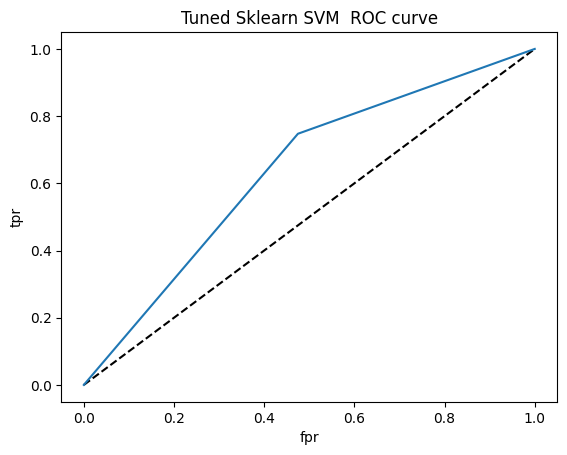

Tuned Sklearn SVM  ROC_AUC: 0.6363476567192989
       default payment next month  y_pred_tst
6907                            0           0
24575                           0           0
26766                           0           1
2156                            1           0
3179                            0           0
29382                           0           0
24454                           0           1
23886                           0           0
5504                            0           0
29720                           0           0
6908                            0           0
2159                            0           1
20842                           1           1
25128                           0           0
18808                           0           0
19077                           0           1
24731                           0           0
3054                            1           0
8488                            0           0
23921                           0

In [22]:
print(train_X.columns)
drop_cols =["SEX","EDUCATION",'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
model_tst = SVC(kernel='rbf', C=1000,class_weight='balanced')
model_tst.fit(train_X.drop(columns=drop_cols), train_y)

y_tst= model_tst.predict(test_X.drop(columns=drop_cols))

fpr, tpr, thresholds = roc_curve(test["default payment next month"].values.ravel(),y_tst.ravel())
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Tuned Sklearn SVM  ROC curve')
plt.show()
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test["default payment next month"].values.ravel(),y_tst.ravel())
print("Tuned Sklearn SVM  ROC_AUC:",roc_auc_score(test["default payment next month"].values.ravel(),y_tst.ravel()))

test["y_pred_tst"] =y_tst
print(test[["default payment next month","y_pred_tst"]].head(25).to_string())